<a href="https://www.kaggle.com/code/prasadpil/dental-care-cleaning?scriptVersionId=180828819" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Published on August 19, 2023.  by Marília Prata, mpwolke

In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import plotly.offline as py
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cusersmarildownloadsdentalcsv/dental.csv


#Dental Care Utilization 

"This dataset provides beneficiary and service counts for annual dental visits, dental preventive services, dental treatment, and dental exams by rendering providers (by NPI) for calendar year (CY) 2018. It includes fee-for-service (FFS), Geographic Managed Care, and Pre-Paid Health Plans delivery systems. Rendering providers are categorized as either rendering or rendering at a safety net clinic. Beneficiaries are grouped by Age 0-20 and Age 21+."

Source: https://www.denti-cal.ca.gov/

#I think SVC is service and Annotations for DDS are Not the same for Data Scientists:)

I couldn't find out if Prev is Preventive and if SVC is Service (Dental service)

#In other words, SVC and Annotations mean another thing to DDS (Dental Doctors). 

In [13]:
df = pd.read_csv("/kaggle/input/cusersmarildownloadsdentalcsv/dental.csv", delimiter=';', encoding='utf8')
pd.set_option('display.max_columns', None)
df.head()

,RENDERING_NPI,PROVIDER_LEGAL_NAME,CALENDAR_YEAR,DELIVERY_SYSTEM,PROVIDER_TYPE,AGE_GROUP,ADV_USER_CNT,ADV_USER_ANNOTATION_CODE,ADV_SVC_CNT,ADV_SVC_ANNOTATION_CODE,PREV_USER_CNT,PREV_USER_ANNOTATION_CODE,PREV_SVC_CNT,PREV_SVC_ANNOTATION_CODE,TXMT_USER_CNT,TXMT_USER_ ANNOTATION_CODE,TXMT_SVC_CNT,TXMT_SVC_ANNOTATION_CODE,EXAM_USER_CNT,EXAM_USER_ANNOTATION_CODE,EXAM_SVC_CNT,EXAM_SVC_ANNOTATION_CODE
0,1003003781,CHOTI SUPAK,2018,FFS,RENDERING,AGE 0-20,101.0,NaN,847.0,NaN,89.0,NaN,216.0,NaN,37.0,NaN,115.0,NaN,83.0,NaN,98.0,NaN
1,1003003781,CHOTI SUPAK,2018,FFS,RENDERING,AGE 21+,67.0,NaN,253.0,NaN,19.0,NaN,30.0,NaN,43.0,NaN,73.0,NaN,15.0,NaN,15.0,NaN
2,1003004698,"GODFREY III, MERLE FRANKLIN,",2018,FFS,RENDERING,AGE 21+,357.0,NaN,1213.0,NaN,123.0,NaN,131.0,NaN,357.0,NaN,712.0,NaN,316.0,NaN,316.0,NaN
3,1003009440,VONTELA REKHA,2018,FFS,RENDERING,AGE 0-20,975.0,NaN,8783.0,NaN,930.0,NaN,3732.0,NaN,208.0,NaN,456.0,NaN,919.0,NaN,1081.0,NaN
4,1003009440,VONTELA REKHA,2018,FFS,RENDERING,AGE 21+,837.0,NaN,5337.0,NaN,706.0,NaN,1396.0,NaN,335.0,NaN,824.0,NaN,744.0,NaN,744.0,NaN


#Data Dentistry

Data Dentistry: How Data Are Changing Clinical Care and Research

Citation: Schwendicke F, Krois J. Data Dentistry: How Data Are Changing Clinical Care and Research. J Dent Res. 2022 Jan;101(1):21-29. doi: 10.1177/00220345211020265. Epub 2021 Jul 8. PMID: 34238040; PMCID: PMC8721539.


"Data are a key resource for modern societies and expected to improve quality, accessibility, affordability, safety, and equity of health care. Dental care and research are currently transforming into what we term data dentistry, with 3 main applications: 1) medical data analysis uses deep learning, allowing one to master unprecedented amounts of data (language, speech, imagery) and put them to productive use. 2) Data-enriched clinical care integrates data from individual (e.g., demographic, social, clinical and omics data, consumer data), setting (e.g., geospatial, environmental, provider-related data), and systems level (payer or regulatory data to characterize input, throughput, output, and outcomes of health care) to provide a comprehensive and continuous real-time assessment of biologic perturbations, individual behaviors, and context. 

"Data for research include open research data and data sharing, allowing one to appraise, benchmark, pool, replicate, and reuse data. Concerns and confidence into data-driven applications, stakeholders' and system's capabilities, and lack of data standardization and harmonization currently limit the development and implementation of data dentistry."

"Aspects of bias and data-user interaction require attention. Action items for the dental community circle around increasing data availability, refinement, and usage; demonstrating safety, value, and usefulness of applications; educating the dental workforce and consumers; providing performant and standardized infrastructure and processes; and incentivizing and adopting open data and data sharing."

https://pubmed.ncbi.nlm.nih.gov/34238040/

In [14]:
df.isnull().sum()

RENDERING_NPI                     0
PROVIDER_LEGAL_NAME               2
CALENDAR_YEAR                     0
DELIVERY_SYSTEM                   0
PROVIDER_TYPE                     0
AGE_GROUP                         0
ADV_USER_CNT                   5848
ADV_USER_ANNOTATION_CODE      18452
ADV_SVC_CNT                    5848
ADV_SVC_ANNOTATION_CODE       18452
PREV_USER_CNT                  8744
PREV_USER_ANNOTATION_CODE     15556
PREV_SVC_CNT                   4592
PREV_SVC_ANNOTATION_CODE      19708
TXMT_USER_CNT                  5792
TXMT_USER_ ANNOTATION_CODE    18508
TXMT_SVC_CNT                   5792
TXMT_SVC_ANNOTATION_CODE      18508
EXAM_USER_CNT                  4712
EXAM_USER_ANNOTATION_CODE     19588
EXAM_SVC_CNT                   4712
EXAM_SVC_ANNOTATION_CODE      19588
dtype: int64

In [15]:
!pip install dataprep

#Dataprep is So cool that I have Not to change to lower case to work in a Pythonic Way

In [16]:
#Code by https://docs.dataprep.ai/user_guide/clean/clean_headers.html

from dataprep.clean import clean_headers
clean_headers(df)

Column Headers Cleaning Report:
	22 values cleaned (100.0%)


,rendering_npi,provider_legal_name,calendar_year,delivery_system,provider_type,age_group,adv_user_cnt,adv_user_annotation_code,adv_svc_cnt,adv_svc_annotation_code,prev_user_cnt,prev_user_annotation_code,prev_svc_cnt,prev_svc_annotation_code,txmt_user_cnt,txmt_user_annotation_code,txmt_svc_cnt,txmt_svc_annotation_code,exam_user_cnt,exam_user_annotation_code,exam_svc_cnt,exam_svc_annotation_code
0,1003003781,CHOTI SUPAK,2018,FFS,RENDERING,AGE 0-20,101.0,NaN,847.0,NaN,89.0,NaN,216.0,NaN,37.0,NaN,115.0,NaN,83.0,NaN,98.0,NaN
1,1003003781,CHOTI SUPAK,2018,FFS,RENDERING,AGE 21+,67.0,NaN,253.0,NaN,19.0,NaN,30.0,NaN,43.0,NaN,73.0,NaN,15.0,NaN,15.0,NaN
2,1003004698,"GODFREY III, MERLE FRANKLIN,",2018,FFS,RENDERING,AGE 21+,357.0,NaN,1213.0,NaN,123.0,NaN,131.0,NaN,357.0,NaN,712.0,NaN,316.0,NaN,316.0,NaN
3,1003009440,VONTELA REKHA,2018,FFS,RENDERING,AGE 0-20,975.0,NaN,8783.0,NaN,930.0,NaN,3732.0,NaN,208.0,NaN,456.0,NaN,919.0,NaN,1081.0,NaN
4,1003009440,VONTELA REKHA,2018,FFS,RENDERING,AGE 21+,837.0,NaN,5337.0,NaN,706.0,NaN,1396.0,NaN,335.0,NaN,824.0,NaN,744.0,NaN,744.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24295,1992911408,THE POPPY W,2018,FFS,RENDERING SNC,AGE 0-20,36.0,NaN,39.0,NaN,33.0,NaN,34.0,NaN,NaN,1.0,NaN,1.0,32.0,NaN,32.0,NaN
24296,1992911408,THE POPPY W,2018,FFS,RENDERING SNC,AGE 21+,152.0,NaN,244.0,NaN,119.0,NaN,142.0,NaN,94.0,NaN,140.0,NaN,88.0,NaN,93.0,NaN
24297,1992917926,JOB ALLEN J,2018,FFS,RENDERING SNC,AGE 0-20,46.0,NaN,138.0,NaN,29.0,NaN,87.0,NaN,16.0,NaN,48.0,NaN,19.0,NaN,57.0,NaN
24298,1992938864,DUNIVAN JANETTE,2018,FFS,RENDERING SNC,AGE 0-20,176.0,NaN,662.0,NaN,176.0,NaN,662.0,NaN,0.0,NaN,0.0,NaN,176.0,NaN,662.0,NaN


#Write the line below. Otherwise the headers would remain the same at the beginning.

In [17]:
df=clean_headers(df)

Column Headers Cleaning Report:
	22 values cleaned (100.0%)


#Checking Dataset

In [18]:
# checking dataset

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  24300
Columns  :  22

Features : 
 ['rendering_npi', 'provider_legal_name', 'calendar_year', 'delivery_system', 'provider_type', 'age_group', 'adv_user_cnt', 'adv_user_annotation_code', 'adv_svc_cnt', 'adv_svc_annotation_code', 'prev_user_cnt', 'prev_user_annotation_code', 'prev_svc_cnt', 'prev_svc_annotation_code', 'txmt_user_cnt', 'txmt_user_annotation_code', 'txmt_svc_cnt', 'txmt_svc_annotation_code', 'exam_user_cnt', 'exam_user_annotation_code', 'exam_svc_cnt', 'exam_svc_annotation_code']

Missing values :   194402

Unique values :  
 rendering_npi                10849
provider_legal_name          10945
calendar_year                    1
delivery_system                  3
provider_type                    2
age_group                        2
adv_user_cnt                  1934
adv_user_annotation_code         1
adv_svc_cnt                   5325
adv_svc_annotation_code          2
prev_user_cnt                 1543
prev_user_annotation_code        1
prev_svc_cnt           

#What's Prev (Preventive?), SVC (Dental Service?). Adv (Advanced User?)

#Correlation matrix

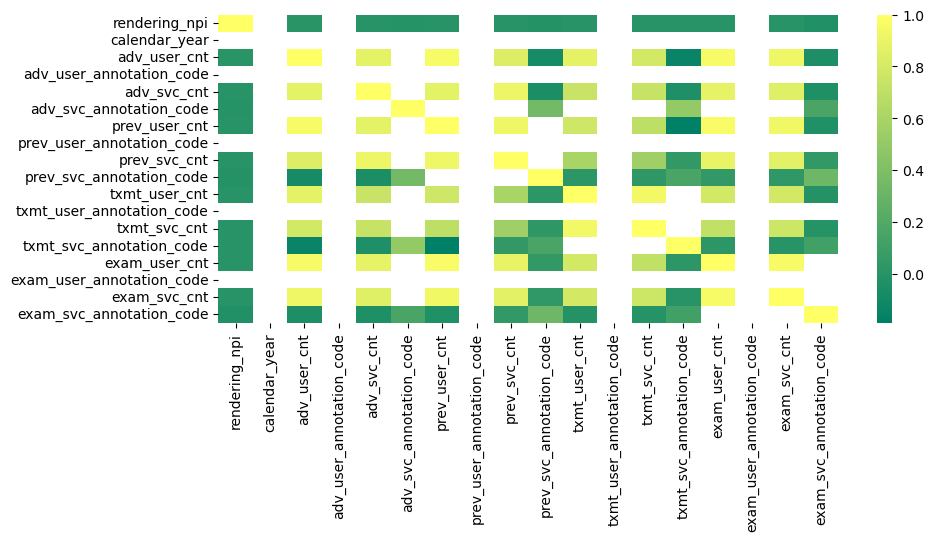

In [19]:
dfcorr=df.corr()
dfcorr
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=False,cmap='summer')
plt.show()

#AI-based dental diagnostics

Artificial Intelligence in Dentistry: Chances and Challenges

Citation: Schwendicke F, Samek W, Krois J. Artificial Intelligence in Dentistry: Chances and Challenges. J Dent Res. 2020 Jul;99(7):769-774. doi: 10.1177/0022034520915714. Epub 2020 Apr 21. PMID: 32315260; PMCID: PMC7309354.

"The term "artificial intelligence" (AI) refers to the idea of machines being capable of performing human tasks. This succinct narrative review describes the application, limitations and possible future of AI-based dental diagnostics, treatment planning, and conduct, for example, image analysis, prediction making, record keeping, as well as dental research and discovery."

"AI-based applications will streamline care, relieving the dental workforce from laborious routine tasks, increasing health at lower costs for a broader population, and eventually facilitate personalized, predictive, preventive, and participatory dentistry. However, AI solutions have not by large entered routine dental practice, mainly due to 1) limited data availability, accessibility, structure, and comprehensiveness, 2) lacking methodological rigor and standards in their development, 3) and practical questions around the value and usefulness of these solutions, but also ethics and responsibility."

"Any AI application in dentistry should demonstrate tangible value by, for example, improving access to and quality of care, increasing efficiency and safety of services, empowering and enabling patients, supporting medical research, or increasing sustainability. Individual privacy, rights, and autonomy need to be put front and center; a shift from centralized to distributed/federated learning may address this while improving scalability and robustness."

"Lastly, trustworthiness into, and generalizability of, dental AI solutions need to be guaranteed; the implementation of continuous human oversight and standards grounded in evidence-based dentistry should be expected. Methods to visualize, interpret, and explain the logic behind AI solutions will contribute ("explainable AI"). Dental education will need to accompany the introduction of clinical AI solutions by fostering digital literacy in the future dental workforce."

https://pubmed.ncbi.nlm.nih.gov/32315260/

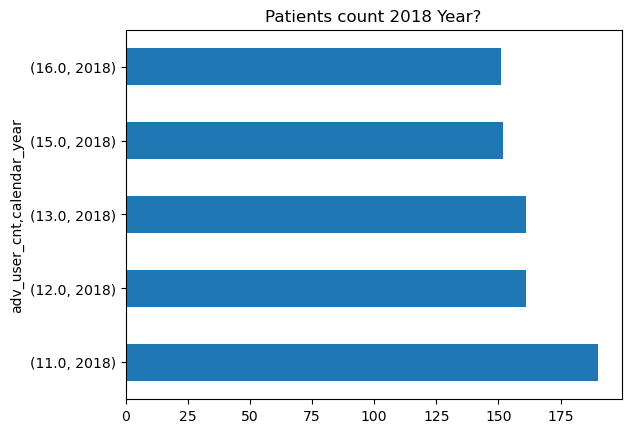

In [20]:
#Some Visualization
df[['adv_user_cnt', 'calendar_year']].value_counts().head().plot(kind='barh')

plt.title('Patients count 2018 Year?');

#A DDS (Dental Doctor) with only 11-16 patients during any year would be so screwed : ) 

#I love you Fabrizio. That snippet is so Amazing!

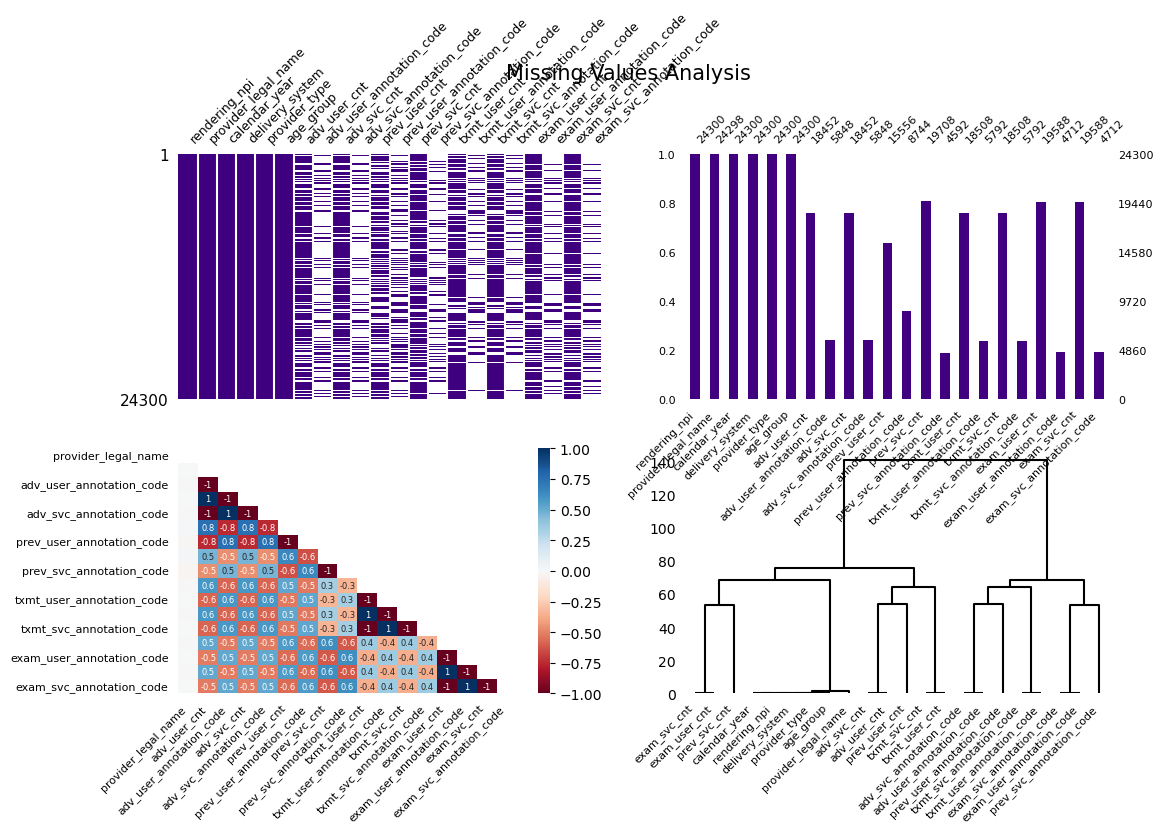

In [21]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(df,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(df, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(df,fontsize=8,ax=axs[2]);
msno.dendrogram(df,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);
#plt.tight_layout()

#Closing Arguments:

Even with my poor knowledge I've experienced  the difficulties to find Dentistry data and understand the meaning of features.

Unfortunately, we still have limited Dentistry data availability, accessibility, structure, and comprehensiveness, 2) lacking methodological rigor and standards in their development. 

I hope in the future, with more Dental professionals that could understand the importance of collecting and dealing with data, we'll have more dentistry data information. which means: "Data for research, open research data and data sharing, allowing one to appraise, benchmark, pool, replicate, and reuse data." 

#Acknowledgements:

Fabbasso https://www.kaggle.com/code/fabrizio78/forbes-dataset